<a href="https://colab.research.google.com/github/FrancoB0822/TP-FINALCD/blob/main/TP_FINAL_INT_CS_DATOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos las librerías que vamos a utilizar en el entrenamiento del moldeo

In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

Importamos la base de datos en la cual vamos a trabajar

In [4]:
data = pd.read_csv("breast_cancer.csv")

Exploración del dataset

In [5]:
data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,2
679,2,1,1,1,2,1,1,1,1,2
680,5,10,10,3,7,3,8,10,2,4
681,4,8,6,4,3,4,10,6,1,4


In [6]:
data.shape

(683, 10)

In [7]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


Limpieza y preparación del data set

Nos aseguramos que no existan valores nulos

In [9]:
data.isna().sum()

,0
Clump Thickness,0
Uniformity of Cell Size,0
Uniformity of Cell Shape,0
Marginal Adhesion,0
Single Epithelial Cell Size,0
Bare Nuclei,0
Bland Chromatin,0
Normal Nucleoli,0
Mitoses,0
Class,0


Reemplazamos las variables de la etiqueta class: 2 a 0 y 4 a 1

In [10]:
data["Class"].replace(2,0,inplace=True)
data["Class"].replace(4,1,inplace=True)

In [11]:
data["Class"].unique()

array([0, 1])

Verificamos si la modificación se realizó correctamente

In [12]:
data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,0
679,2,1,1,1,2,1,1,1,1,0
680,5,10,10,3,7,3,8,10,2,1
681,4,8,6,4,3,4,10,6,1,1


Analizamos los datos mediante graficos.

Histograma

array([[<Axes: title={'center': 'Clump Thickness'}>,
        <Axes: title={'center': 'Uniformity of Cell Size'}>,
        <Axes: title={'center': 'Uniformity of Cell Shape'}>],
       [<Axes: title={'center': 'Marginal Adhesion'}>,
        <Axes: title={'center': 'Single Epithelial Cell Size'}>,
        <Axes: title={'center': 'Bare Nuclei'}>],
       [<Axes: title={'center': 'Bland Chromatin'}>,
        <Axes: title={'center': 'Normal Nucleoli'}>,
        <Axes: title={'center': 'Mitoses'}>],
       [<Axes: title={'center': 'Class'}>, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

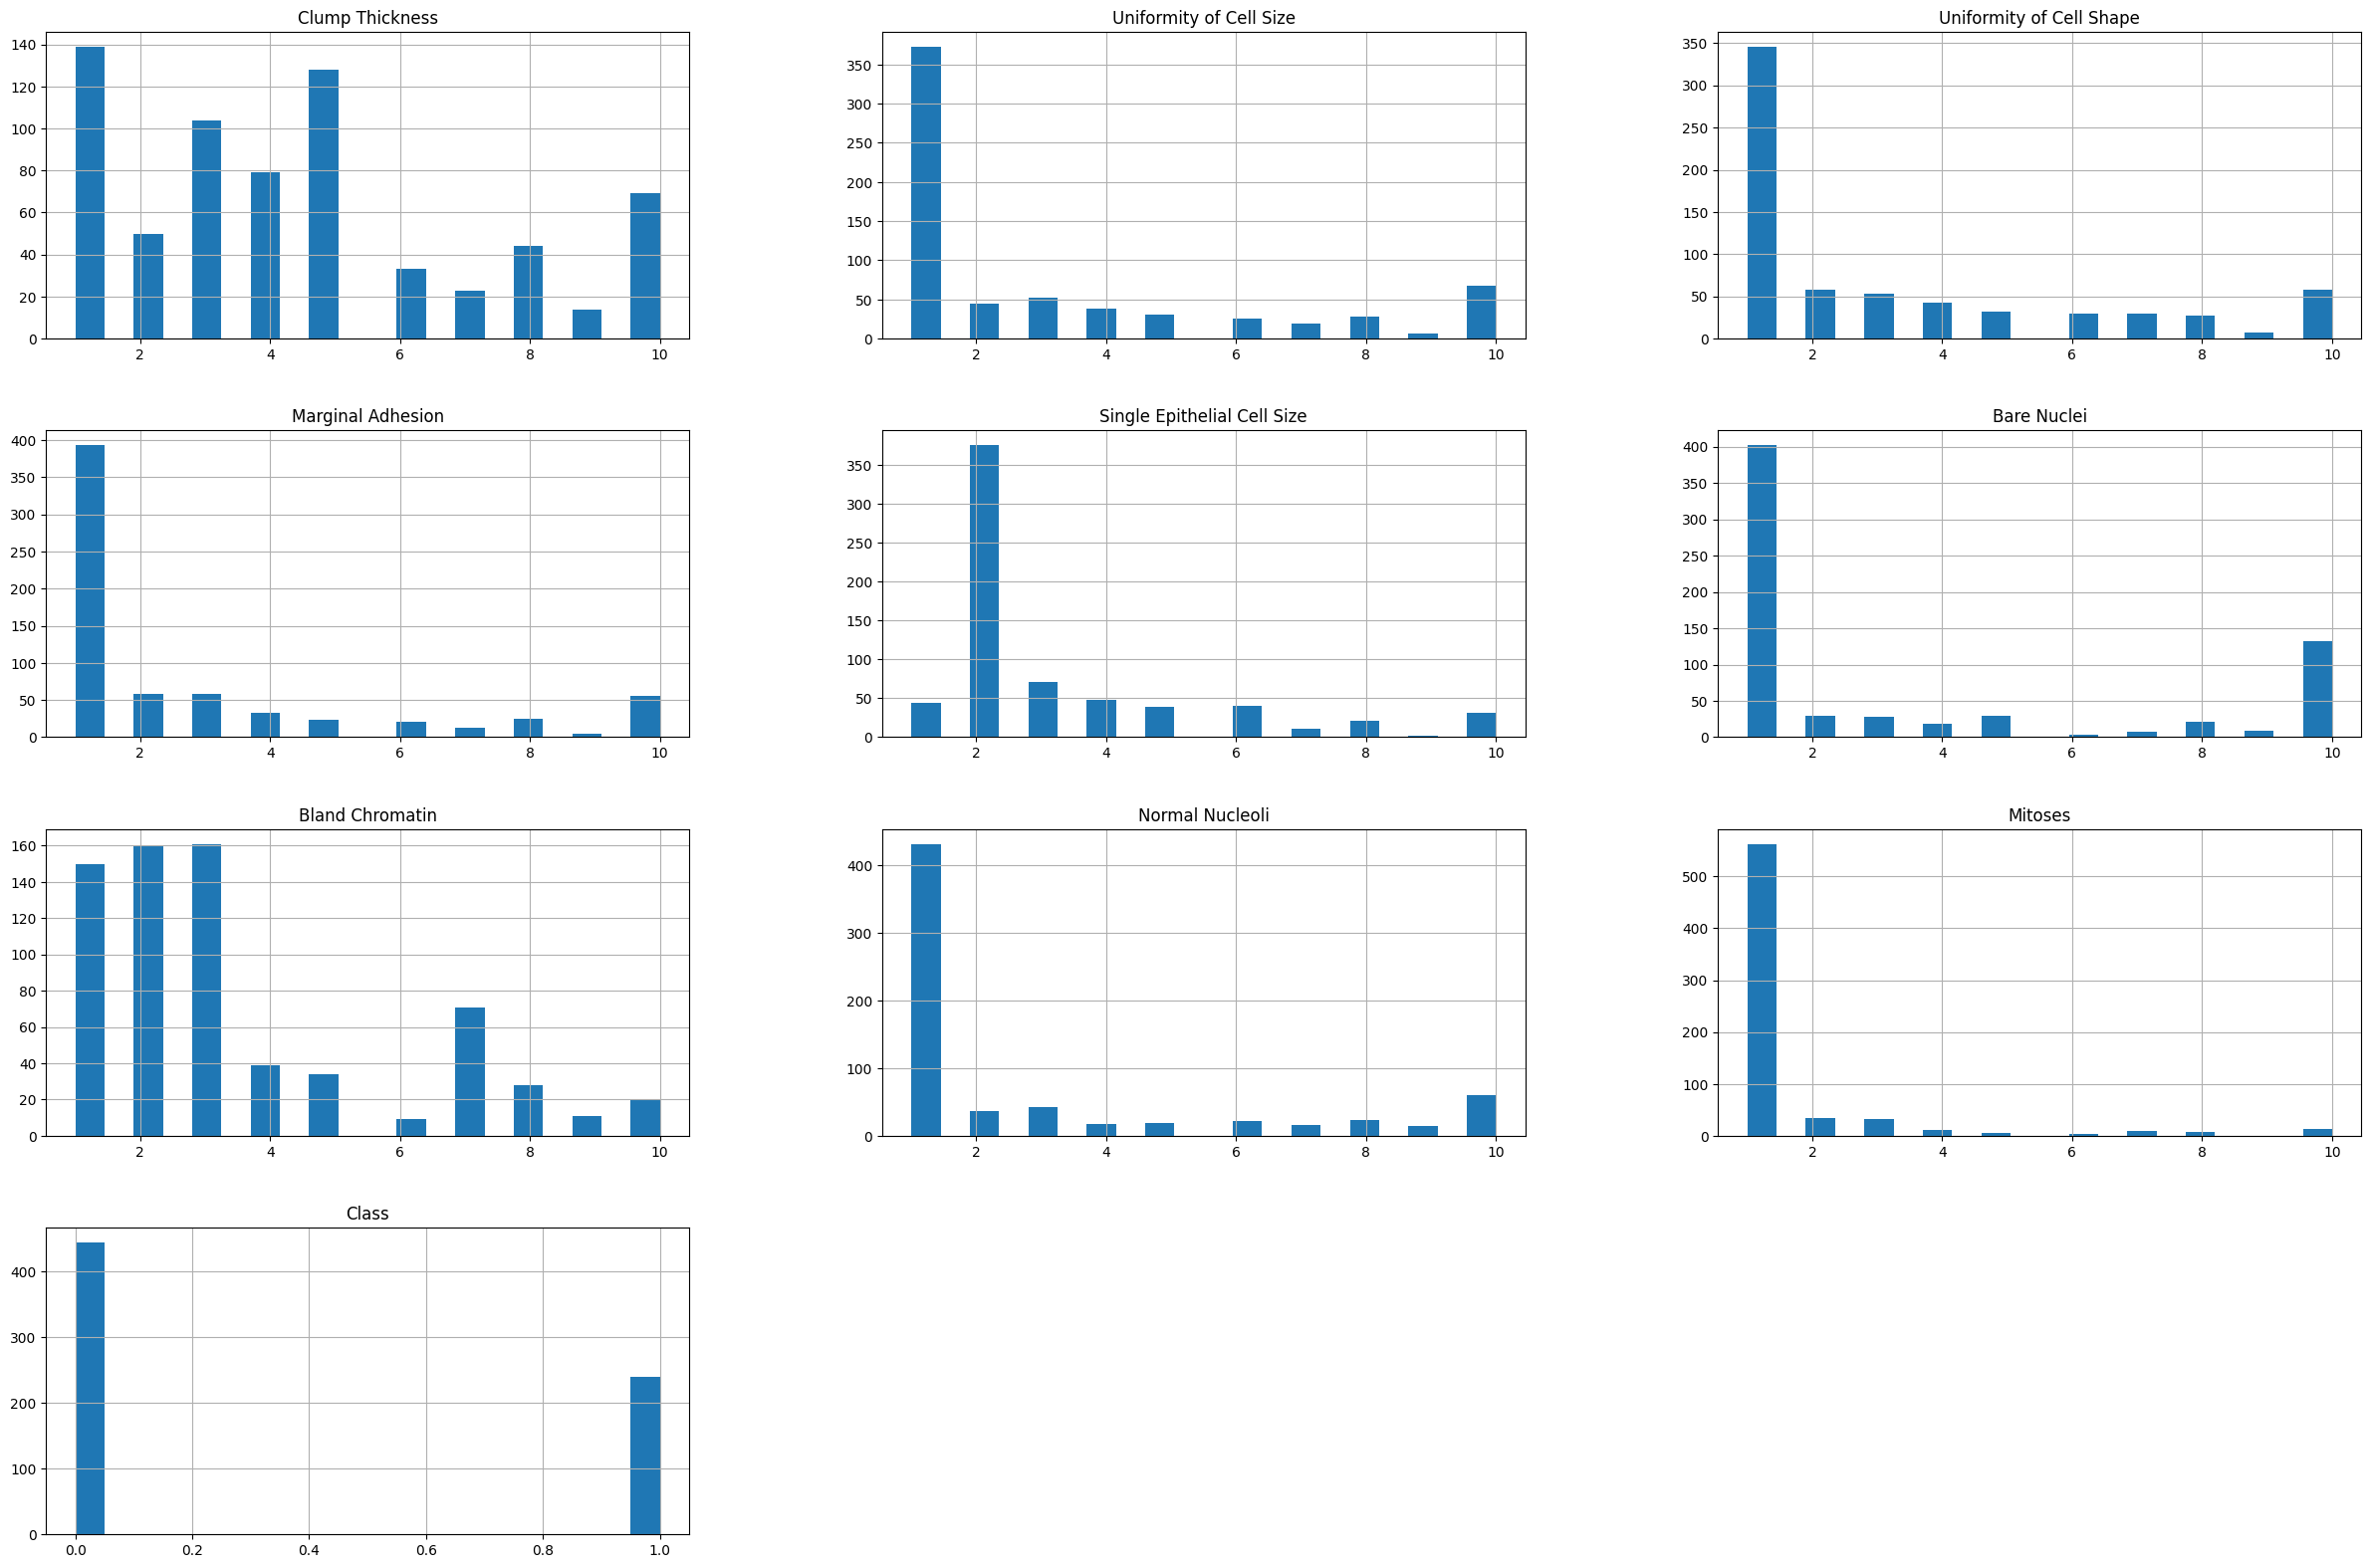

In [13]:
data.hist(bins=20, figsize=(30,30), layout=(6,3))

Diagrama de cajas

<Axes: >

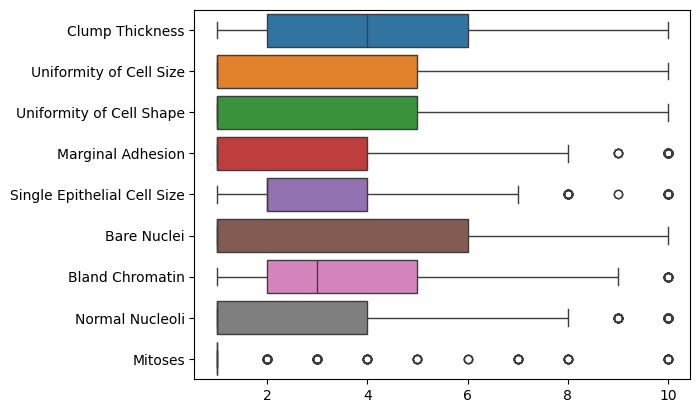

In [14]:
sb.boxplot(data=data.drop('Class', axis=1), orient='h')

Gráfico de torta
Ademas reemplazamos 0 por benigno y 1 por maligno para una completa visualización



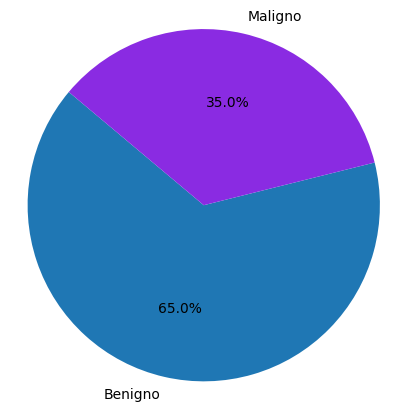

In [15]:
class_counts = data['Class'].value_counts()
class_counts = data['Class'].value_counts()
colors = ['#1f77b4', '#8a2be2']
class_labels = data['Class'].replace({0: 'Benigno', 1: 'Maligno'}).value_counts()
plt.figure(figsize=(5, 5))
plt.pie(class_labels, labels=class_labels.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.show()

Pairplot

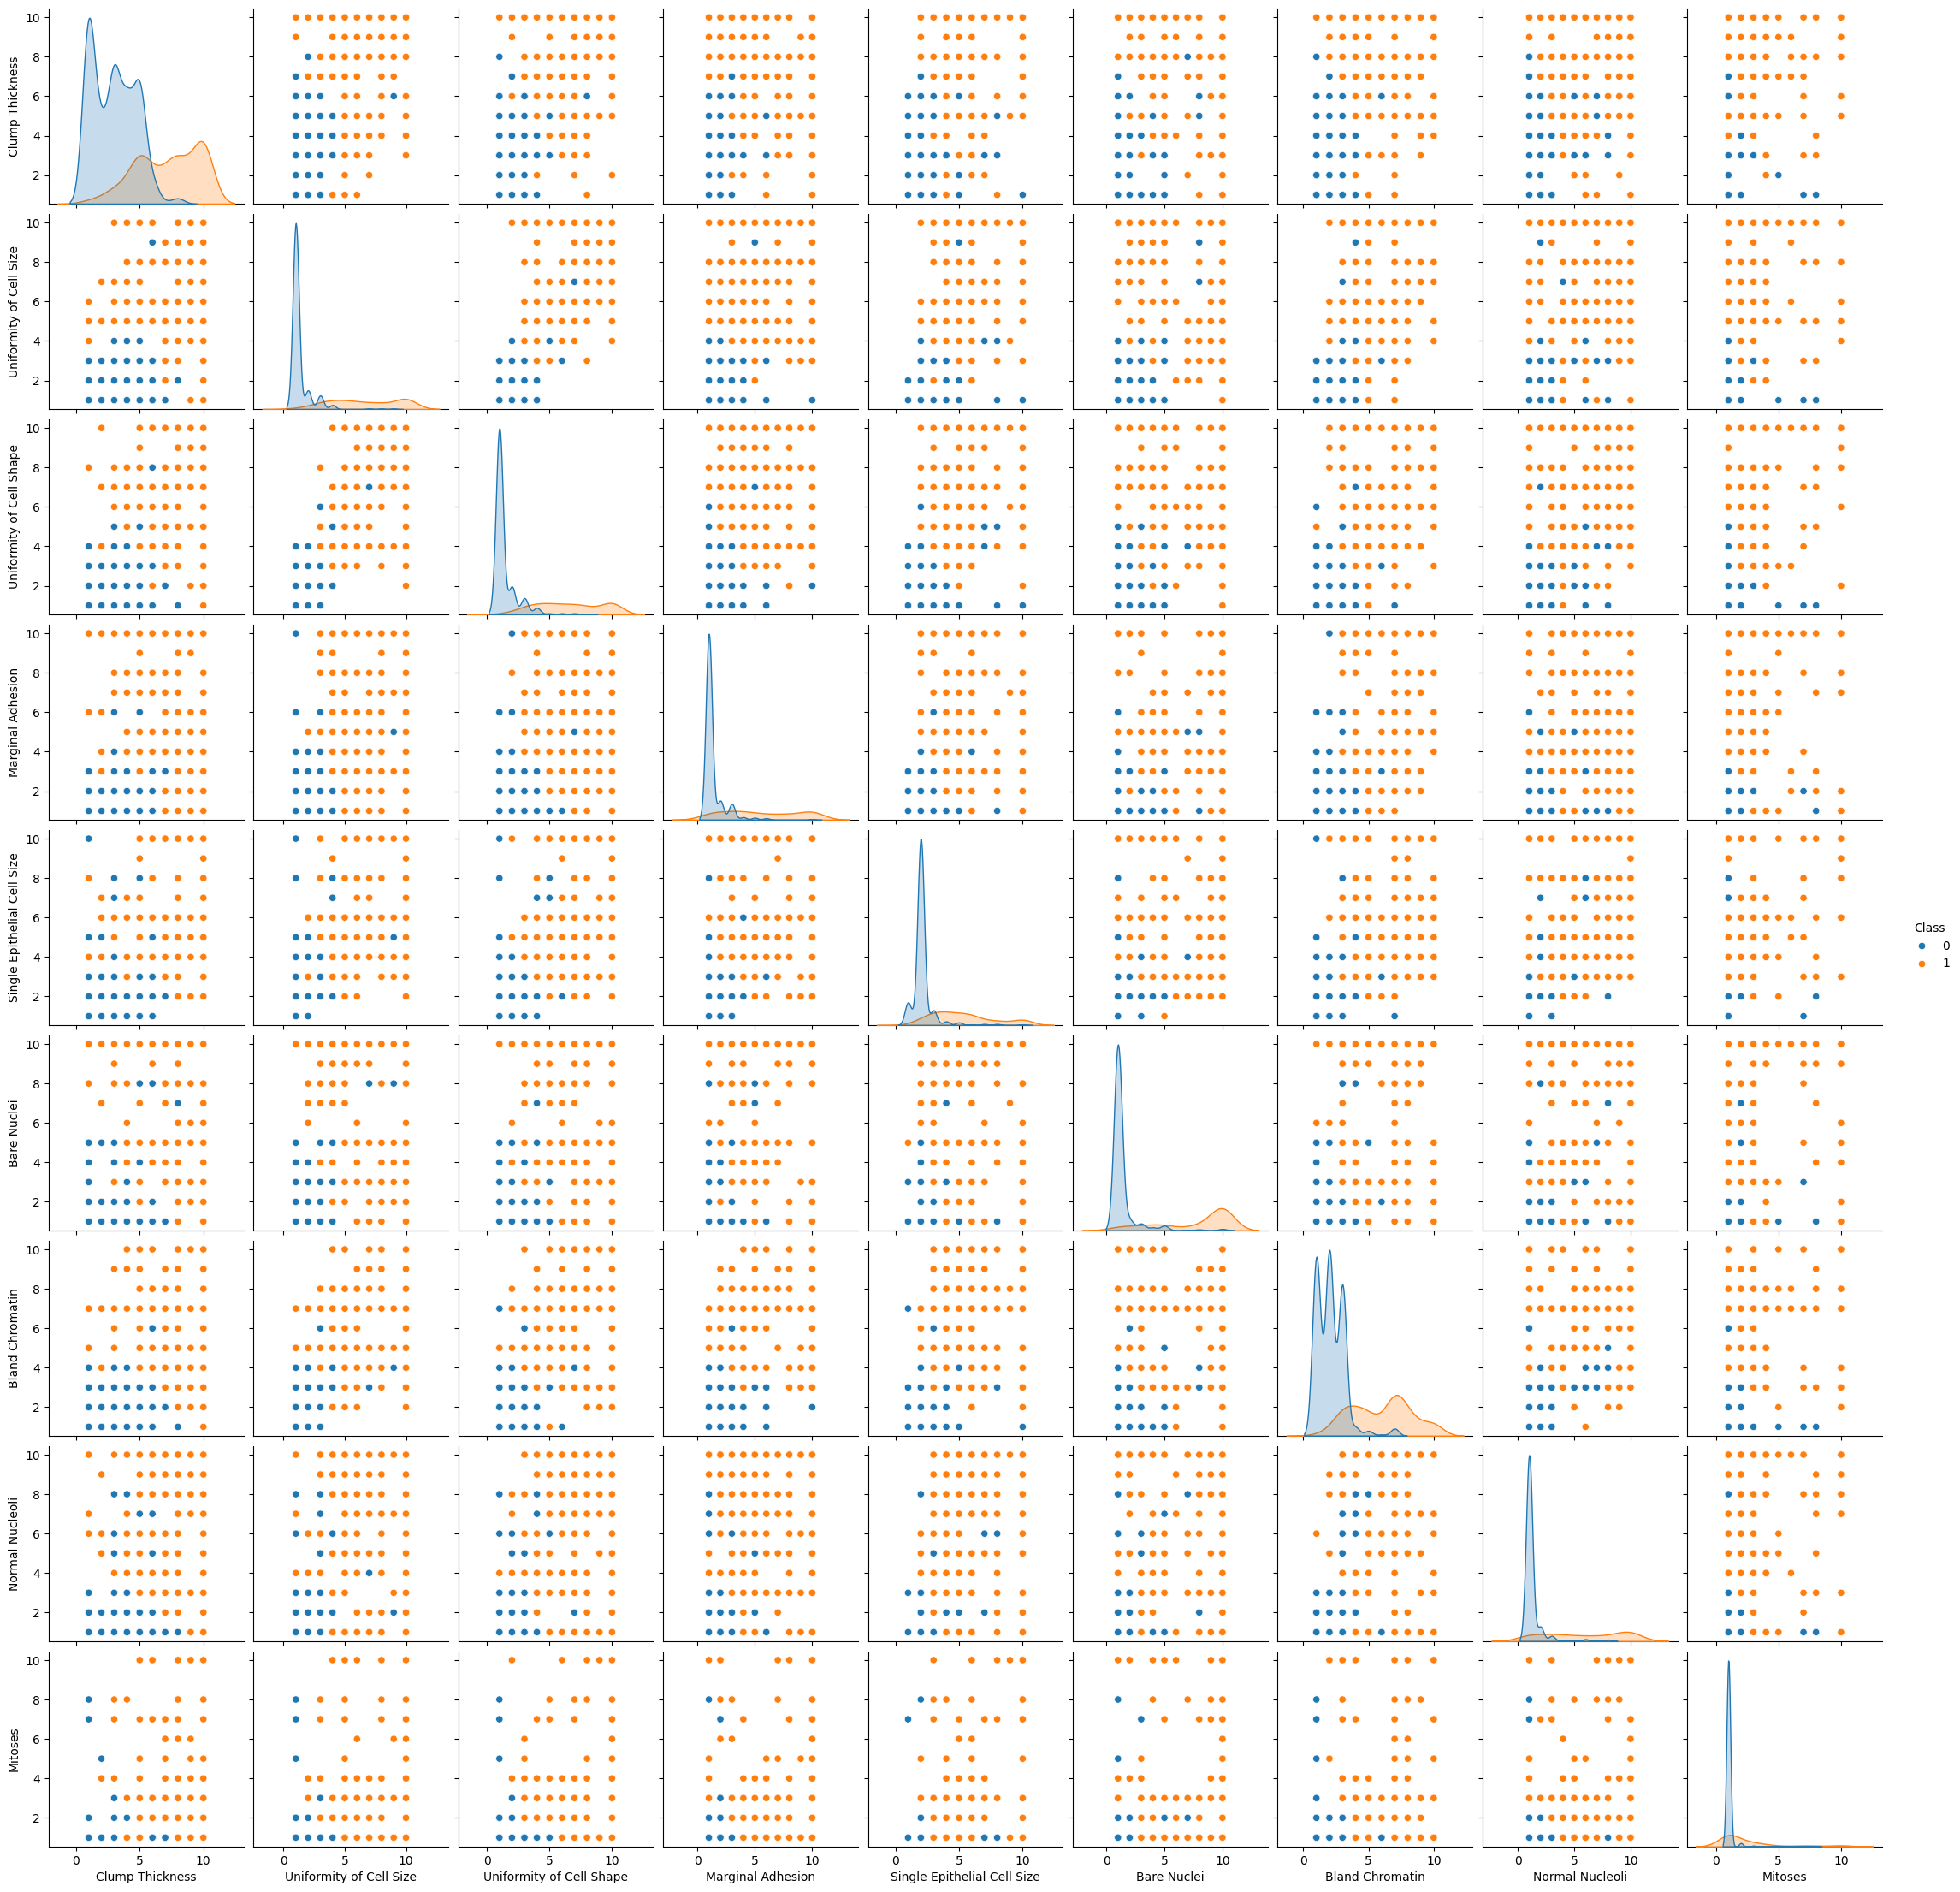

In [16]:
sb.pairplot(data, hue='Class')

Mapa de calor

<Axes: >

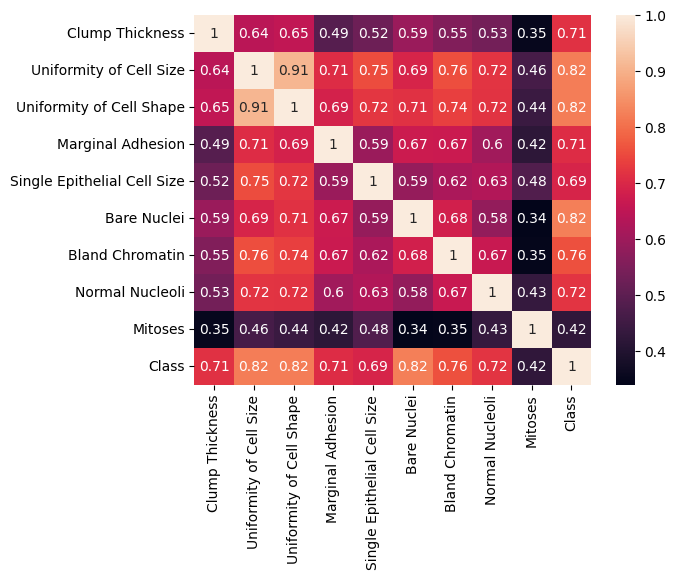

In [17]:
sb.heatmap(data.corr(),annot=True)


Seleccionamos las caractericias relevantes



In [18]:
X= data.drop('Class', axis=1)
y=data['Class']

Importamos y utilizamos sklear para dividir los datos en subconjuntos entrenamiento y prueba

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Verificamos las dimensiones de los subconjuntos de entrenamiento y prueba

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((512, 9), (171, 9), (512,), (171,))

In [21]:
X_train.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
556,7,6,10,5,3,10,9,10,2
66,8,3,8,3,4,9,8,9,8
571,8,10,10,10,6,10,10,10,1
299,1,1,1,1,2,1,1,1,1
355,1,1,3,1,1,1,2,1,1


In [22]:
X_test.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
113,1,1,1,1,2,5,1,1,1
378,3,1,1,1,2,1,2,1,1
303,5,5,5,2,5,10,4,3,1
504,4,7,8,3,4,10,9,1,1
301,1,1,1,1,2,1,1,1,1


In [23]:
y_test.head()

,Class
113,0
378,0
303,1
504,1
301,0


In [24]:
y_train.head()

,Class
556,1
66,1
571,1
299,0
355,0


Estandarizamos los datos

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

Importamos el modelo de Regresión Logistica y lo entrenamos

In [26]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

Definimos las predicciones con los modelos de entrenamiento y prueba.

Luego visualizamos la efectividad en ambos casos.

In [27]:
predtrain = logreg.predict(X_train)
predtest = logreg.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predtest)
accuracy_score(y_train, predtrain)

print(f"Accuracy de train: {accuracy_score(y_train, predtrain)}")
print(f"Accuracy de test: {accuracy_score(y_test, predtest)}")


Accuracy de train: 0.98046875
Accuracy de test: 0.9473684210526315


In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predtest))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       107
           1       0.94      0.92      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



Utilizamos la matriz de confusión para evaluar cómo el modelo clasifica las muestras en el conjunto de prueba

In [30]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predtest), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])
pd.DataFrame(confusion_matrix(y_test, predtest), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,103,4
Real: Si,5,59


Probamos el modelo

In [31]:
nuevo_diagnostico = [1, 1, 1, 2, 3, 4, 5, 1, 1]
predtest = logreg.predict([nuevo_diagnostico])

if predtest[0] == 0:
  print("Benigno")
else:
  print("Maligno")

Maligno


Arbol de decisión

Importamos la libreria sklearn para dividir en dos subconjuntos de datos: entrenamiento y prueba


In [32]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=0.25)

Importamos el modelo del arbol de decisión y lo entrenamos

In [33]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(X_ent, y_ent)

predicciones2 = dtc.predict(X_ent)
predicciones = dtc.predict(X_pru)

Visualizamos la efectividad del modelo en ambos casos.

In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(y_ent, predicciones2)
accuracy_score(y_pru, predicciones)
print(f"Accuracy de train: {accuracy_score(y_ent, predicciones2)}")
print(f"Accuracy de test: {accuracy_score(y_pru, predicciones)}")

Accuracy de train: 1.0
Accuracy de test: 0.9590643274853801


In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       110
           1       0.95      0.93      0.94        61

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [36]:
from sklearn.metrics import confusion_matrix
cms = pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,107,3
Real: Si,4,57


Visualizamos el gráfico del arbol de decisión

[Text(0.27801724137931033, 0.9545454545454546, 'Uniformity of Cell Size <= 2.5\n0.454\n512\n[334, 178]\nBenigno'),
 Text(0.06896551724137931, 0.8636363636363636, 'Bare Nuclei <= 3.5\n0.05\n311\n[303, 8]\nBenigno'),
 Text(0.034482758620689655, 0.7727272727272727, '0.0\n297\n[297, 0]\nBenigno'),
 Text(0.10344827586206896, 0.7727272727272727, 'Clump Thickness <= 3.5\n0.49\n14\n[6, 8]\nMaligno'),
 Text(0.06896551724137931, 0.6818181818181818, '0.0\n5\n[5, 0]\nBenigno'),
 Text(0.13793103448275862, 0.6818181818181818, 'Marginal Adhesion <= 7.5\n0.198\n9\n[1, 8]\nMaligno'),
 Text(0.10344827586206896, 0.5909090909090909, '0.0\n8\n[0, 8]\nMaligno'),
 Text(0.1724137931034483, 0.5909090909090909, '0.0\n1\n[1, 0]\nBenigno'),
 Text(0.4870689655172414, 0.8636363636363636, 'Uniformity of Cell Shape <= 2.5\n0.261\n201\n[31, 170]\nMaligno'),
 Text(0.3103448275862069, 0.7727272727272727, 'Single Epithelial Cell Size <= 4.0\n0.36\n17\n[13, 4]\nBenigno'),
 Text(0.27586206896551724, 0.6818181818181818, 'Cl

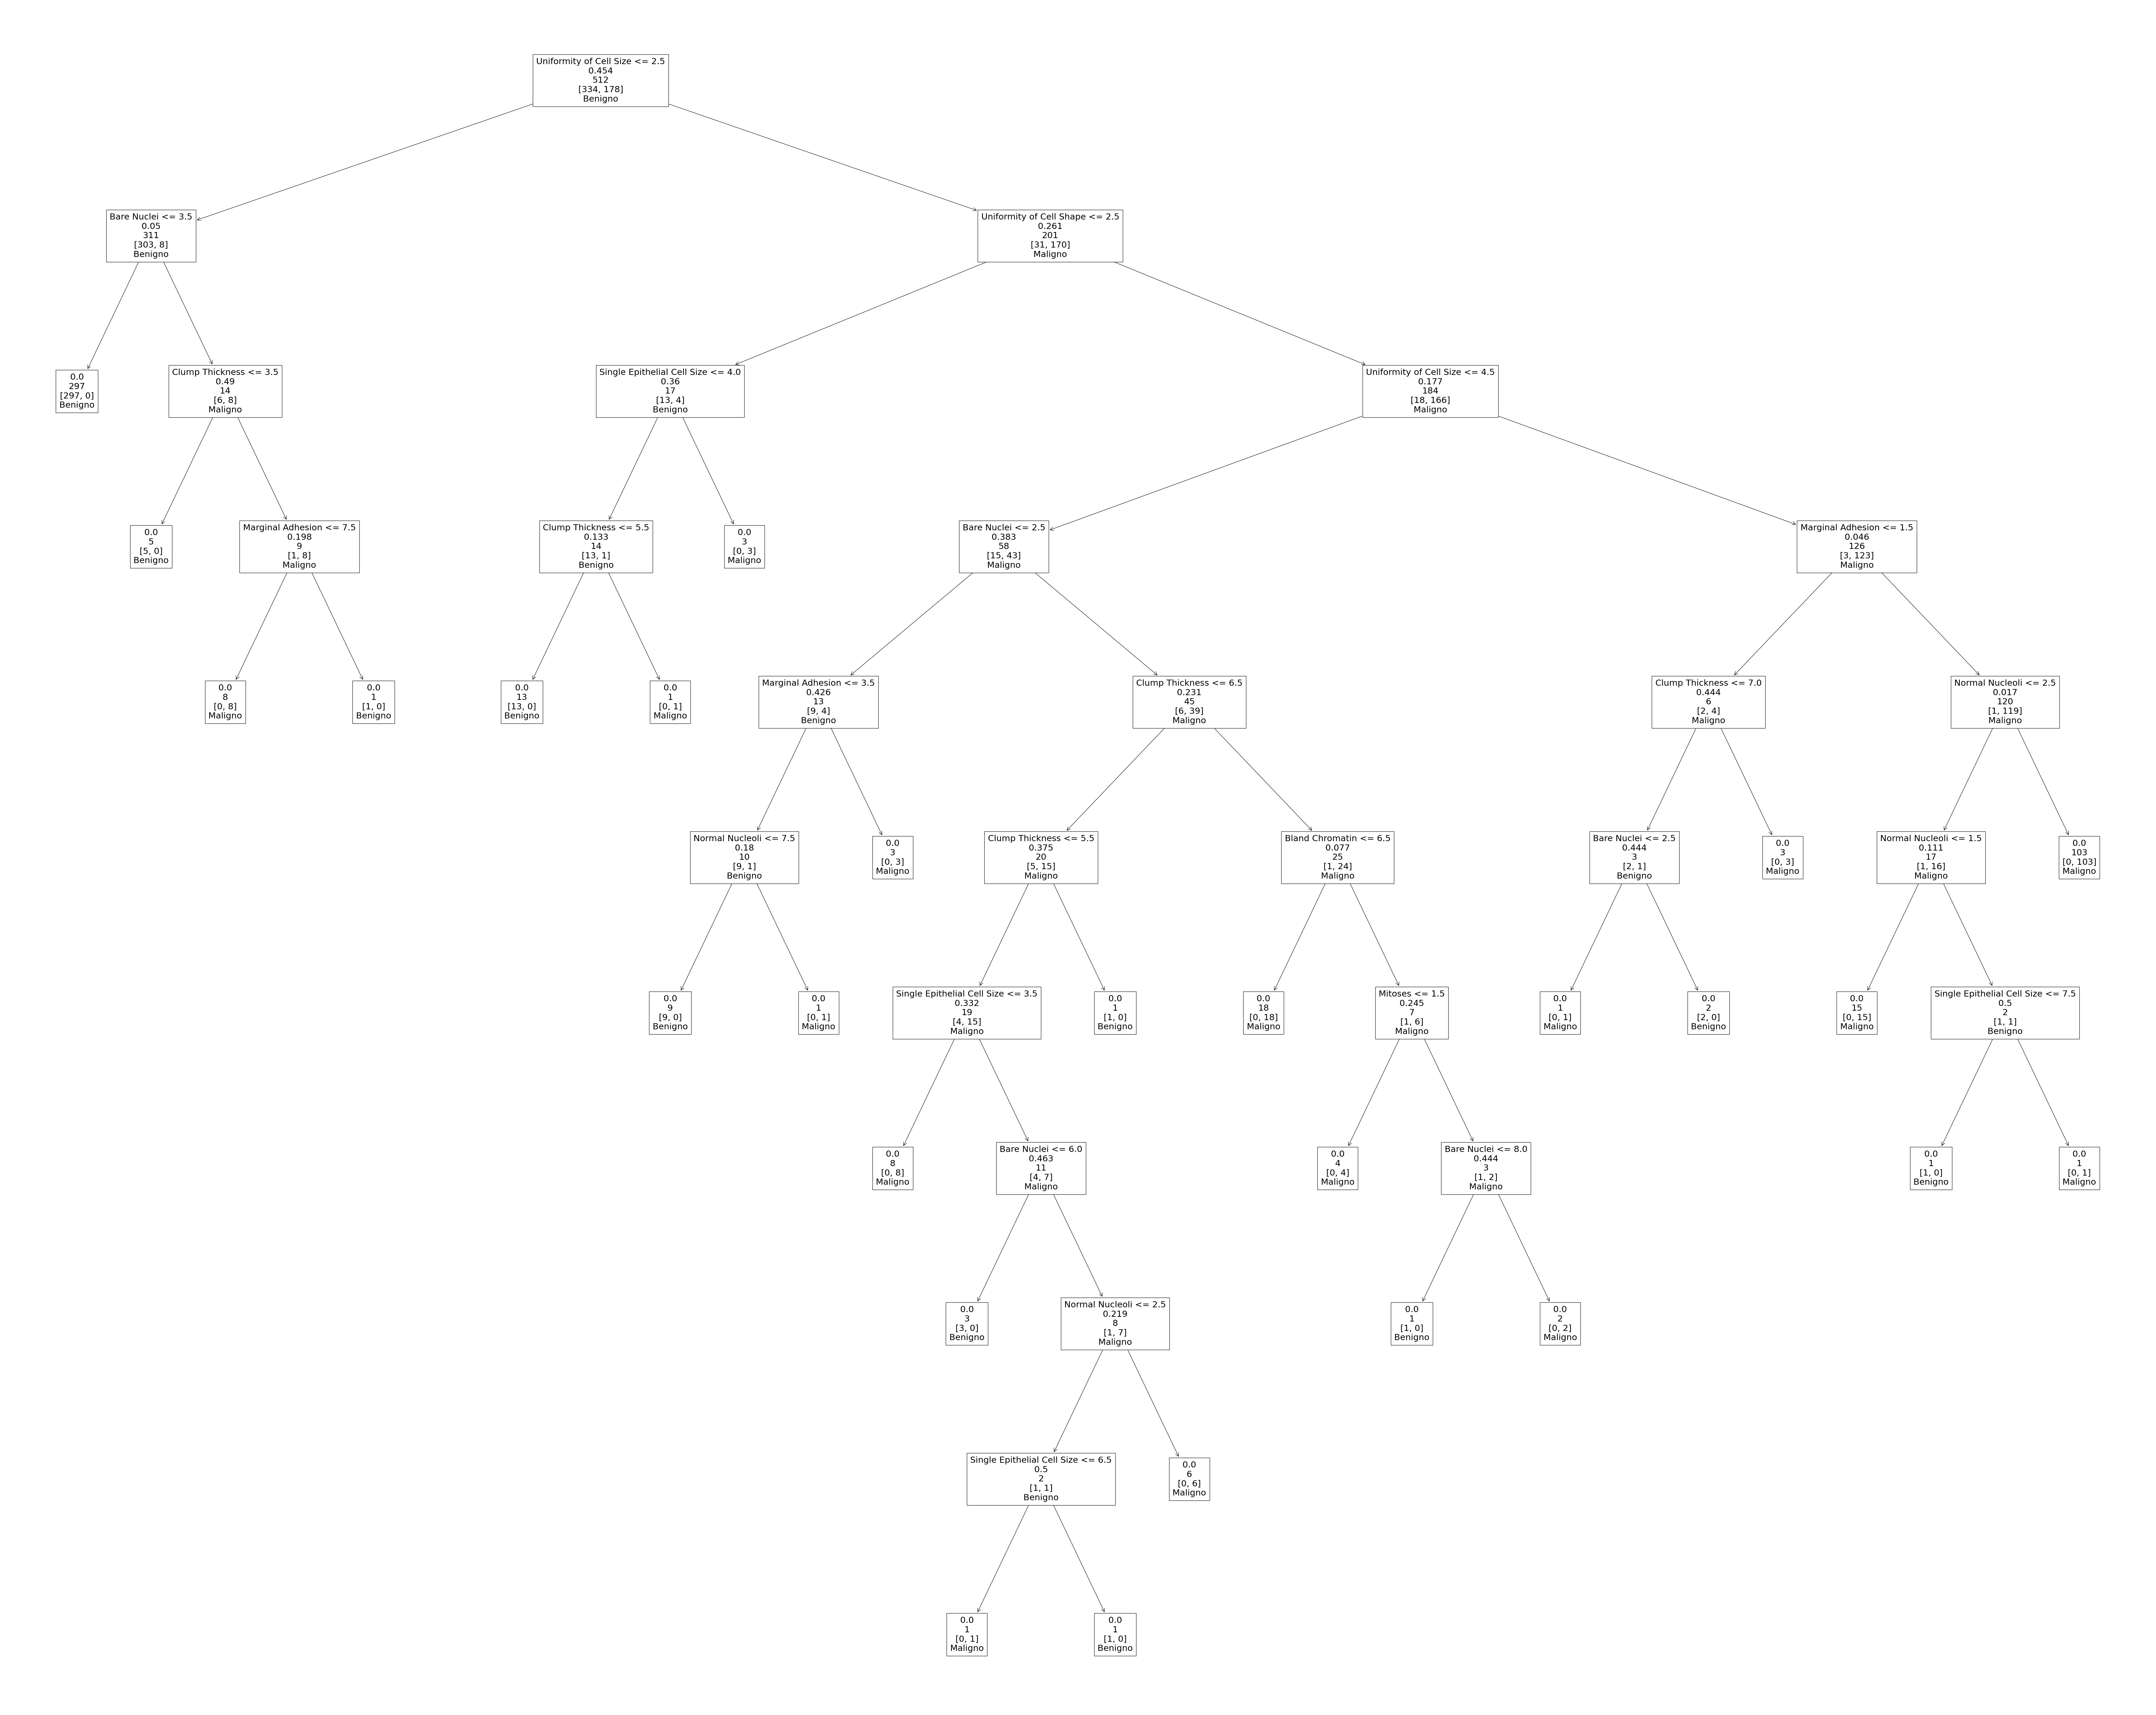

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80))
plot_tree(
    dtc,
    feature_names=X_ent.columns,
    class_names=["Benigno", "Maligno"]
    ,label="none"
)

Probamos el modelo

In [38]:
nueva_diagnostico = [6, 1, 6, 1, 7, 1, 3, 7, 6]
prediccion = dtc.predict([nueva_diagnostico])
if prediccion[0] == 0:
  print("Benigno")
else:
  print("Maligno")

Benigno


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Comparamos los resultados de los diferentes modelos

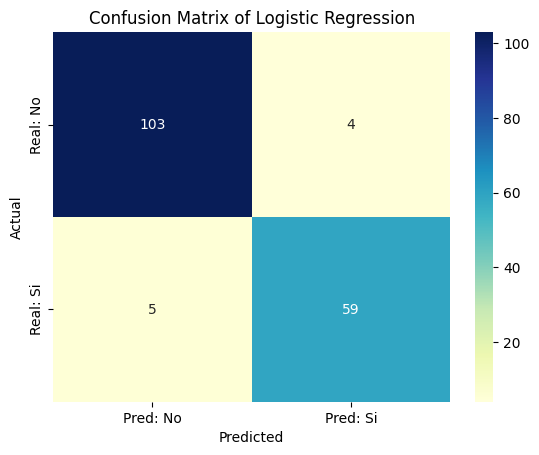

In [39]:
sb.heatmap(cm, annot=True, cmap='YlGnBu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

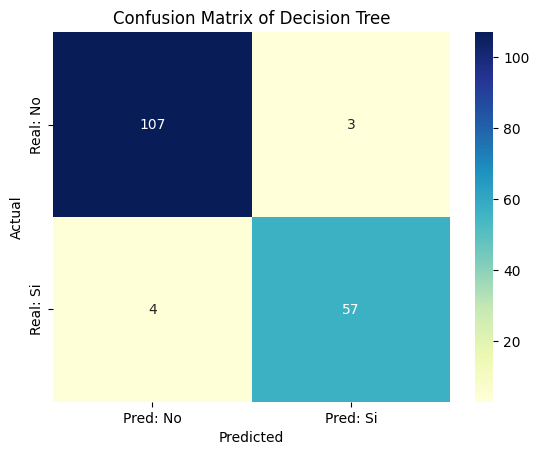

In [40]:
sb.heatmap(cms, annot=True, cmap='YlGnBu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Decision Tree')
plt.show()